# PPHA 30546 Machine Learning Problem Set 1
## Richard Campo

### Chapter 2: Question 3
#### (a)

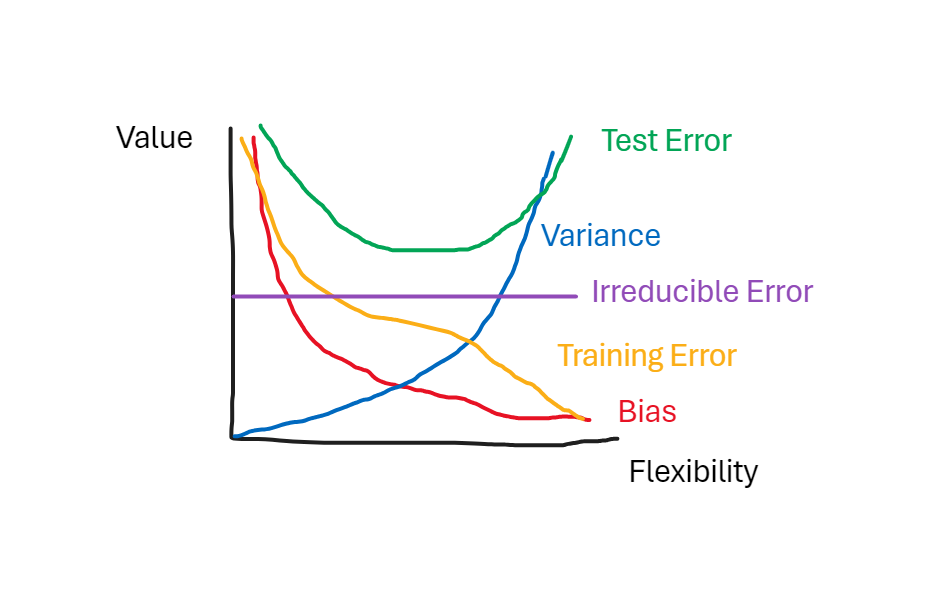

In [53]:
# https://stackoverflow.com/a/11855133
from IPython.display import Image
Image(filename="./Machine Learning Pset 1 Curves.png")

#### (b)
- Bias decreases as flexibility increases because the model can overfit the data. Bias tends to decrease faster at lower levels of flexibility because adding just a little curvature can allow the model to fit the data much better, but once you have lots of flexibility, adding more won't do much.

- Variance increases as flexibility increases because the model is more sensitive to new training data. Variance tends to increase at an increasing rate because very flexible models will change more than less flexible models when provided new training data due to overfitting.

- Training error decreases as flexibility increases because the model can overfit the data. Eventually, the most flexible model can correctly predict every point in the data by overfitting.

- Test error first decreases and then increases as flexibility increases. When flexibility is low, adding flexibility allows the model to more closely fit the training data and accurately predict the test data. However, when flexibility is high, adding flexibility causes overfitting, which lowers training error but increases test error.

- Irreudcible error is a constant = Var(&epsilon;)


### Chapter 2: Question 5

The advantage of a very flexibile approach is that the model can more closely fit the training data and more accurately predict the test data. However, the disadvantage of a very flexible approach is that the model can overfit the training data, meaning the model will make very accurate predictions on the training data, but not generalize to the test data.

A more flexible approach is preferred when the true underlying relationship in the data is very nonlinear because a line can't fit the data well. On the other hand, a less flexible approach is preferred when the true underlying relationship in the data is linear or approximately linear because flexible methods will overfit the data.

### Chapter 2: Question 10
#### (a)

In [54]:
import pandas as pd
import os
PATH = r"C:\Users\RichardCampo\Documents\GitHub\Machine-Learning\Boston"
df_boston = pd.read_csv(os.path.join(PATH, "Boston.csv"))

#### (b)

In [55]:
print(df_boston.shape)
df_boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


There are 506 rows and 14 columns in the dataset. Rows represent census tracts in Boston and columns represent variables describing each census tract.

#### (c)

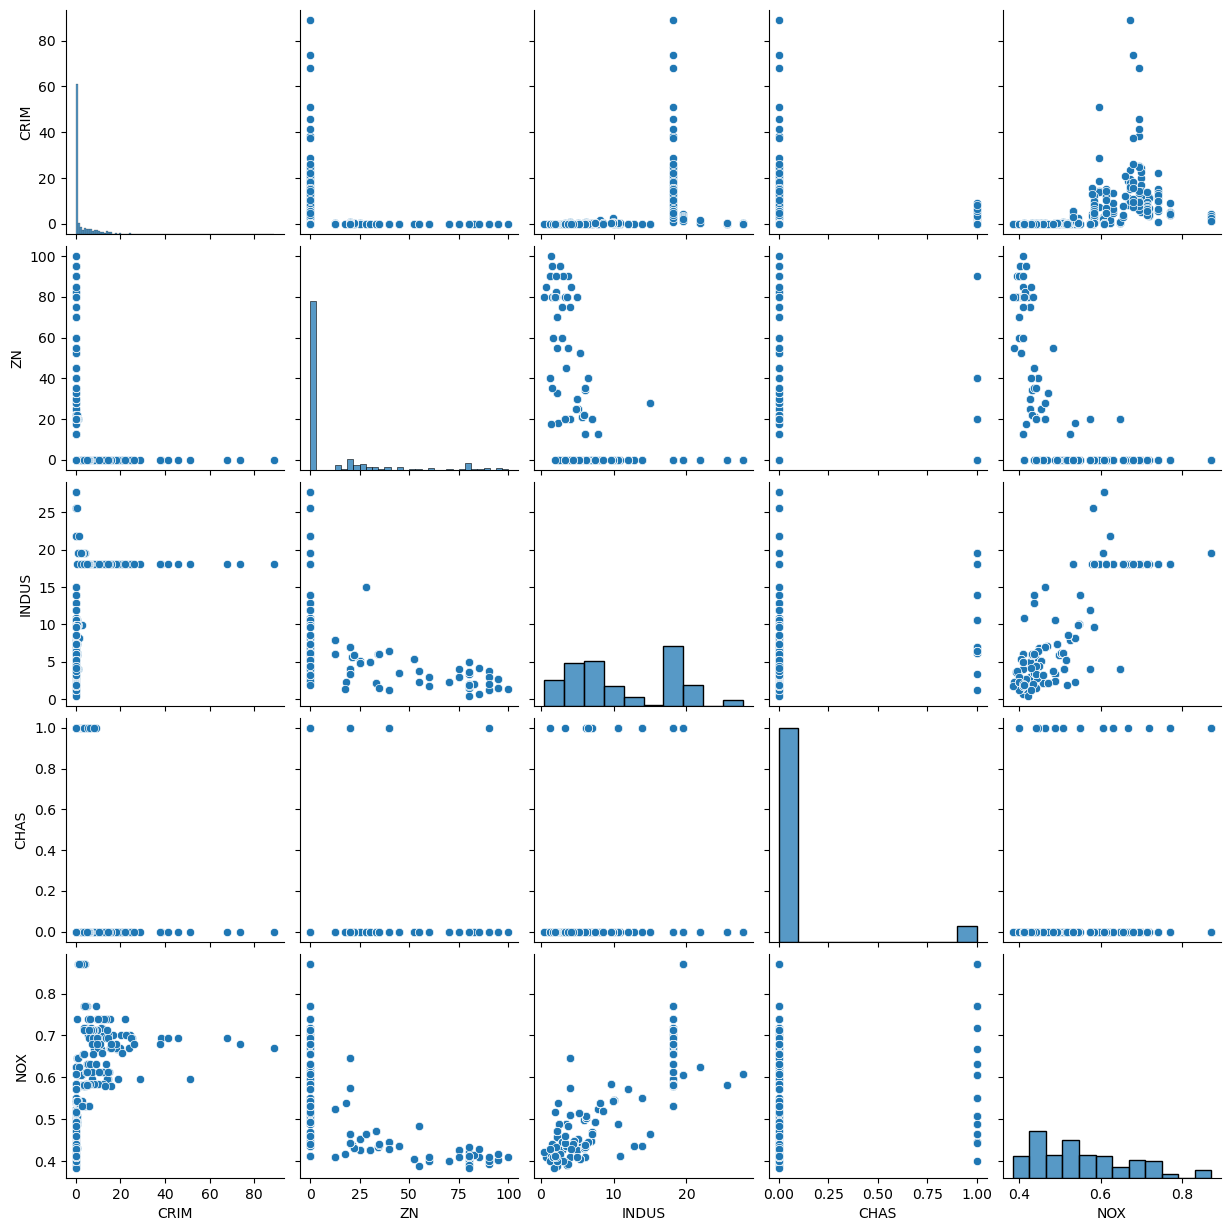

In [56]:
import seaborn as sns
sns.pairplot(df_boston.iloc[:, :5])

Looking at the scatterplots, there is a positive correlations between nitric oxide concentration and the number of acres zoned for industry in a census district, which is unsurprising. It also looks like there is a negative association between the number of acres zoned for residential buildings and the amount of nitric oxide and amount of acres zoned for industry. This also makes sense. Lastly, per capita crime appears to be positively correlated with the concentration of nitric oxides.

#### (d)

In [57]:
df_boston.corr()["CRIM"].sort_values(ascending=False)

CRIM       1.000000
RAD        0.622029
TAX        0.579564
LSTAT      0.452220
NOX        0.417521
INDUS      0.404471
AGE        0.350784
PTRATIO    0.288250
CHAS      -0.055295
ZN        -0.199458
RM        -0.219940
B         -0.377365
DIS       -0.377904
MDEV      -0.385832
Name: CRIM, dtype: float64

Most of the predictors are at least weakly associated with crime. The strongest correlation is between per capita crime and access to radial highways, maybe because areas close to highways are poorer or maybe because criminals use highways to move illegal drugs. Property tax rate is also positively associated with crime, perhaps because property taxes are higher closer to the city center where crime is more prevalent. Lastly, LSTAT, the percentage of people in the census district who are "lower status" (presumably in terms of income), is also positively correlated with per capita crime, which is what we expect.

#### (e)

             CRIM         TAX     PTRATIO
count  506.000000  506.000000  506.000000
mean     3.593761  408.237154   18.455534
std      8.596783  168.537116    2.164946
min      0.006320  187.000000   12.600000
25%      0.082045  279.000000   17.400000
50%      0.256510  330.000000   19.050000
75%      3.647423  666.000000   20.200000
max     88.976200  711.000000   22.000000


array([[<Axes: title={'center': 'CRIM'}>,
        <Axes: title={'center': 'TAX'}>],
       [<Axes: title={'center': 'PTRATIO'}>, <Axes: >]], dtype=object)

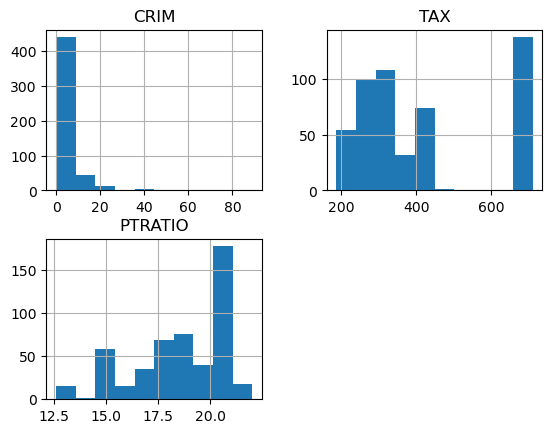

In [58]:
print(df_boston[["CRIM", "TAX", "PTRATIO"]].describe())
df_boston[["CRIM", "TAX", "PTRATIO"]].hist()

Most census tracts have low crime per capita since the mean is only about 3.6. However, a small number of census tracts have high per capita crime rates, up to a maximum of almost 89.

Census tracts in Boston have full-value property tax rates per $10,000 that vary from 187 to 711, but there is a large valley between about 450 and 650. A large group of census tracts have high property tax rates, possibly because they are close to the city center.

Lastly, pupil-teacher ratios vary from 12.6 to 22 pupils per teacher, with a large number of census districts having 20 to 21 pulis per teacher. These higher ratio census districts may also be closer to the city center where schools tend to have less funding per student. 

#### (f)

In [59]:
borders = len(df_boston[df_boston["CHAS"] == 1])

print(borders)
print(borders/len(df_boston) * 100, "%")

35
6.91699604743083 %


35 of the 506 census tracts border the Charles River, or about 7% of census tracts in the dataset.

#### (g)

In [60]:
df_boston["PTRATIO"].median()

19.05

The median pupil-teacher ratio of census tracts in the dataset is 19.05 pupils per teacher.

#### (h)

In [88]:
df_boston.loc[[df_boston["MDEV"].idxmin()]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.9,30.59,5.0


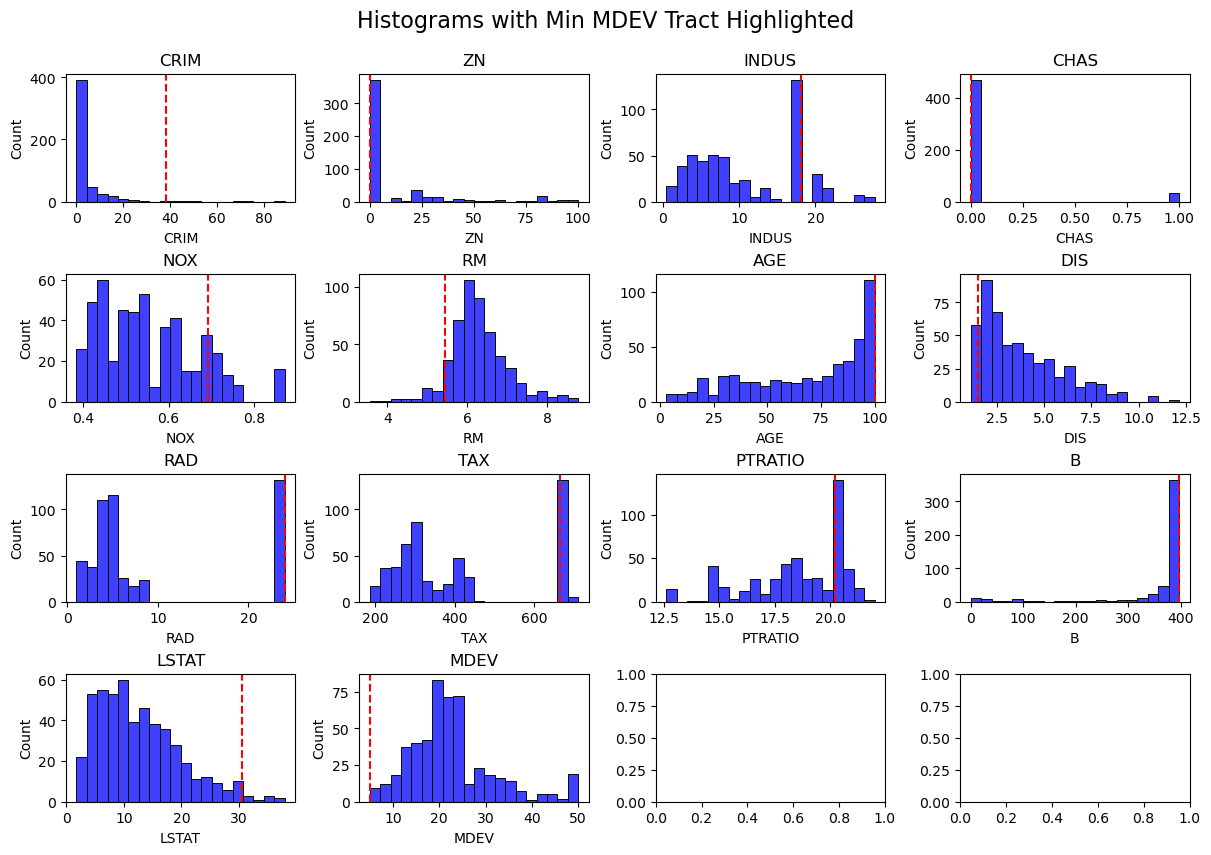

In [90]:
import matplotlib.pyplot as plt

min_row_index = df_boston["MDEV"].idxmin()
min_row = df_boston.loc[[min_row_index]]

# https://stackoverflow.com/a/53649492
fig, axs = plt.subplots(4, 4, figsize=(12, 8), constrained_layout=True)
fig.suptitle("Histograms with Min MDEV Tract Highlighted", fontsize=16, y=1.05)

# Plot a histogram showing distribution for each variable with red line
# showing the value for the census tract with lowest MDEV.
for ax, column in zip(axs.flatten(), df_boston.columns):
    sns.histplot(df_boston[column], bins=20, color='blue', ax=ax)
    ax.axvline(x=min_row[column].values[0], color='red', linestyle='dashed')
    ax.set_title(column)

The census tract with the lowest median value of owner-occupied homes is located in row 398 and has a median home value of $5,000. This is much lower than the median value of $21.2 thousand. This census tract also has high crime per capita, an above average amount of industrially zoned space, above average nitric oxide concentration, low average number of rooms per building, very old buildings, low distance to the city employment centers, high accessibility to radial highways, high property taxes, a high pupil-teacher ratio, and a high proportion of people with low incomes.

#### (i)

In [94]:
print(len(df_boston.loc[df_boston["RM"] > 7]))
print(len(df_boston.loc[df_boston["RM"] > 8]))

64
13


In [108]:
more_than_8 = df_boston.loc[df_boston["RM"] > 8].mean()
avg_values = df_boston.mean()

comparison = pd.concat([more_than_8, avg_values], axis = 1)
comparison.columns = ["more_than_8", "avg_values"]

print(comparison)



         more_than_8  avg_values
CRIM        0.718795    3.593761
ZN         13.615385   11.363636
INDUS       7.078462   11.136779
CHAS        0.153846    0.069170
NOX         0.539238    0.554695
RM          8.348538    6.284634
AGE        71.538462   68.574901
DIS         3.430192    3.795043
RAD         7.461538    9.549407
TAX       325.076923  408.237154
PTRATIO    16.361538   18.455534
B         385.210769  356.674032
LSTAT       4.310000   12.653063
MDEV       44.200000   22.532806


Census tracts with more than eight rooms per dwelling tend to have low crime, have less industrially zoned land, are more likely to border the Charles River, have a smaller share of low income residents, and have high median home values.

### Chapter 3: Question 3
#### (a)

The "true" regression model is: $$salary = \beta_0 + \beta_1 GPA + \beta_2 IQ + \beta_3 level + \beta_4 GPA \times IQ + \beta_5 GPA \times level + \epsilon$$

We estimate the model: $$\widehat{salary} = 50 + 20 (GPA) + 0.07 (IQ) + 35 (level) + 0.01 (GPA \times IQ) - 10 (GPA \times level) + e$$

The answer is (ii). For a fixed value of IQ and GPA, college graduates earn more on average than high school graduates. This is because $\beta_3$, the coefficient of level is 35, meaning a college graduate can expect a $35,000 higher starting salary than a high school graduate on average, all else constant. The estimated coefficient of -10 for the interaction of GPA and level indicates that for college graduates, the slope of GPA is more shallow, but we are interested in the average difference between levels for this question, not GPA.

#### (b)
Based on our model, we predict that the starting salary of a college graduate with an IQ of 110 and a GPA of 4.0 will be $$50 + 20(4.0) + 0.07(110) + 35(1) + 0.01(4.0)(110) - 10 (4.0)(1) = 137.1$$
or $137.1 thousand.

#### (c)

False. Just because the coefficient for the interaction between GPA and IQ is small does not mean there is little evidence of an interaction effect. The formula for a t-test to check if the coefficient is statistically significant is:
$$ t =\frac{\hat{\beta_j} - \beta_j}{SE(\hat{\beta_j})} $$
This means that even if the estimated coefficient is small, as long as the standard error is also very small, the coefficient could be statistically significant.

### Chatper 3: Question 15
#### (a)

In [119]:
import statsmodels.api as sm
from IPython.display import display

predictors = list(df_boston.columns)
predictors.remove("CRIM")

for predictor in predictors:
    X = df_boston[predictor]
    X = sm.add_constant(X) # add intercept to regression model
    y = df_boston["CRIM"]

    model = sm.OLS(y, X).fit()

    print(f"Regression results for {predictor}:")
    print("Coefficients:")
    print(model.params)
    print("R-squared:", model.rsquared)
    print("\n")


Regression results for ZN:
Coefficients:
const    4.429230
ZN      -0.073521
dtype: float64
R-squared: 0.03978347762134549


Regression results for INDUS:
Coefficients:
const   -2.050878
INDUS    0.506847
dtype: float64
R-squared: 0.16359654486292508


Regression results for CHAS:
Coefficients:
const    3.723215
CHAS    -1.871545
dtype: float64
R-squared: 0.003057565547249008


Regression results for NOX:
Coefficients:
const   -13.588062
NOX      30.975259
dtype: float64
R-squared: 0.17432414543196817


Regression results for RM:
Coefficients:
const    20.505997
RM       -2.691045
dtype: float64
R-squared: 0.048373512338981906


Regression results for AGE:
Coefficients:
const   -3.752725
AGE      0.107131
dtype: float64
R-squared: 0.12304917962938533


Regression results for DIS:
Coefficients:
const    9.448871
DIS     -1.542831
dtype: float64
R-squared: 0.14281113255550482


Regression results for RAD:
Coefficients:
const   -2.270880
RAD      0.614137
dtype: float64
R-squared: 0.38691

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=12,  
    shuffle=True 
)